<a href="https://colab.research.google.com/github/DennisChangach/Time-Series-Analysis/blob/main/Task3_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Analysis

A series of data points collected against time is known as a time series. Time series are one of the most common data types encountered in daily life. Some of the examples are energy usage, weather and financial prices or the stock market data.

**Components of a Time Series**
1. Trend: This is the general direction in which something is developing or changing. 
2. Seasonality: A pattern that is repeating at regular time interval.

Time series methods comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of data. Therefore, time series forecasting is the use of a model to predict future values based on previously observed values.

**Dataset**
The dataset contains the monthly Chamapgne sales between 1964 to 1972.

**Mounting Drive**

In [173]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
#Installing necessary dependencies

In [231]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 #Changes default matplotlib plots to this size

import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import meanabs
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [176]:
#loading the datset
file_path = '/content/drive/My Drive/Sancom Interview Assessment/Task_3/Dataset/perrin-freres-monthly-champagne-.csv'
df = pd.read_csv(file_path)
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [177]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


There seem to be NaN values that need to be removed.

In [179]:
#renaming the columns
df.columns=["Date","Sales"]
df.head()

,Date,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [180]:
df.isna().sum()

Date     1
Sales    2
dtype: int64

In [181]:
#dropping the null values
df = df.dropna()
df.isna().sum()

Date     0
Sales    0
dtype: int64

In [182]:
#converting the month column to Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [183]:
#setting the month to be the index
df.set_index('Date',inplace=True)

In [184]:
df.head()

,Sales
Date,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [185]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Exploratory Data Analysis(EDA)


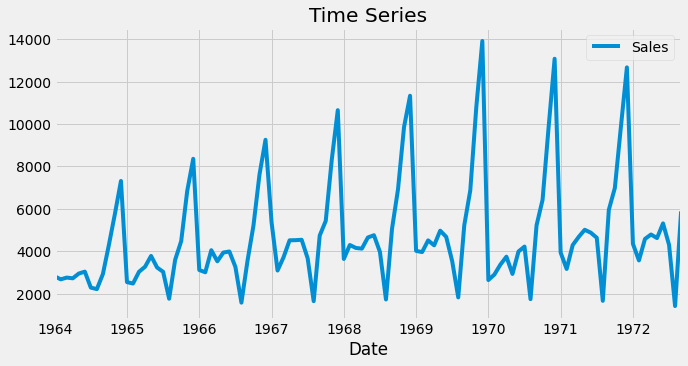

In [186]:
#plotting the data
df.plot(figsize = (10,5));
plt.title('Time Series')
plt.show()

We can generally infer that there is some seasonality in the data due to the spikes observed. The spikes seem to be also increasing in size over time.

**Seasonal Decomposition**

At a high-level, time series data can be thought of as:
1. Level: The average value in the series.
2. Trend: The increasing or decreasing value in the series.
3. Seasonality: The repeating short-term cycle in the series.
4. Noise/Residual: The random variation in the series.

We can use the statsmodel library to 'decompose' the above components.

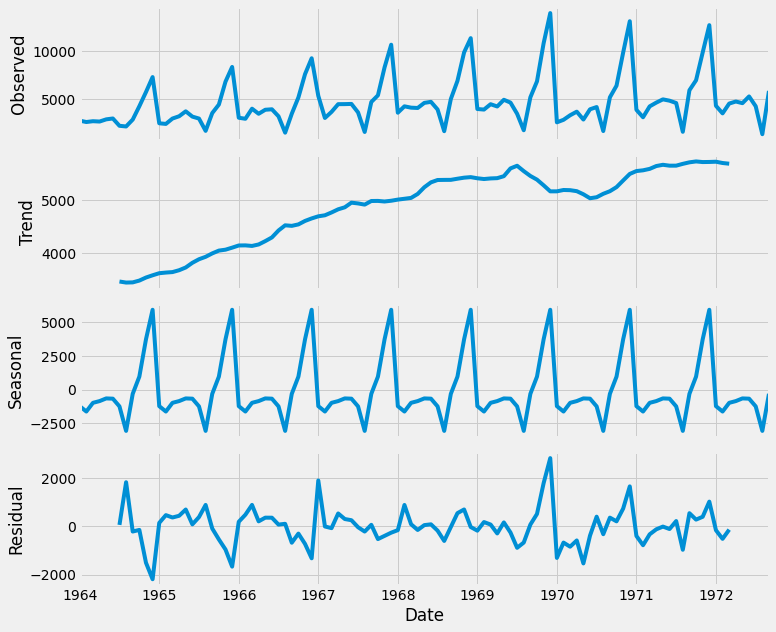

In [187]:
#seasonal decomposition
decomposition = seasonal_decompose(df,model='additive')

#visualization
decomposition.plot();

From the above plot we see a pattern and trend emerging. The sales have have been generally increasing from 1964 to 1972. We also observe a seasonal pattern every year. We can also use a heatmap to visualize the data.

In [188]:
#using a heatmap
heatmap = df.copy()

#adding Month column
heatmap['Month'] = heatmap.index.month_name()

#adding the year column
heatmap['Year'] = heatmap.index.year

#dropping off 1972 as it is not a complete year
heatmap = heatmap[heatmap['Year'] != 1972]

#Pivoting the table
heatmap = heatmap.pivot(index = 'Year',columns = 'Month',values = 'Sales')

# Reorder columns
heatmap = heatmap[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                             'October', 'November', 'December']]
heatmap.head()


Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1964,2815.0,2672.0,2755.0,2721.0,2946.0,3036.0,2282.0,2212.0,2922.0,4301.0,5764.0,7312.0
1965,2541.0,2475.0,3031.0,3266.0,3776.0,3230.0,3028.0,1759.0,3595.0,4474.0,6838.0,8357.0
1966,3113.0,3006.0,4047.0,3523.0,3937.0,3986.0,3260.0,1573.0,3528.0,5211.0,7614.0,9254.0
1967,5375.0,3088.0,3718.0,4514.0,4520.0,4539.0,3663.0,1643.0,4739.0,5428.0,8314.0,10651.0
1968,3633.0,4292.0,4154.0,4121.0,4647.0,4753.0,3965.0,1723.0,5048.0,6922.0,9858.0,11331.0


Text(0.5, 1.0, 'Heatmap_by Month of Year')

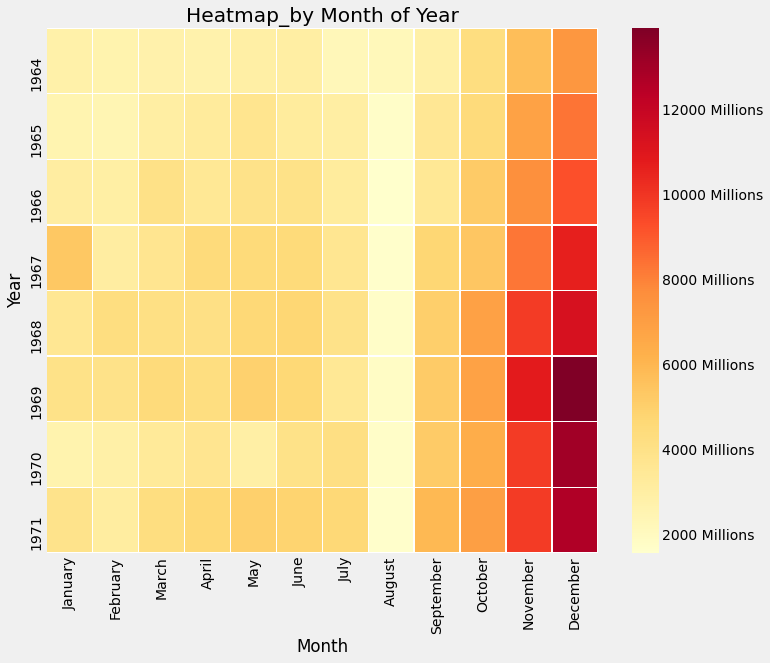

In [189]:
# visualizing the heatmap
sns.heatmap(heatmap,linewidths=.5,cmap = 'YlOrRd',cbar = True,
            cbar_kws = {"format": '%1.0f Millions'}).set_title('Heatmap_by Month of Year')

The above heatmap shows November and December to be the Months with the highest Sales of champagne. This could be attributed to the end of the year parties where people are 'breaking out the champagne'

### Time Series Forecasting



In [190]:
df.tail()

,Sales
Date,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


In [191]:
#splitting the datasets into train and test sets
cutoff = '1970-10-01'

df.sort_index()

train = df[:cutoff]
test = df[cutoff:]

In [192]:
#The test sample is for the last two years
print(test.shape)
test.tail()

(24, 1)


,Sales
Date,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


**Baseline Model- Naive Forecasting**

Before we go knee-deep into machine learning, it is good to use naive forecasting techniques to determine a 'baseline'. That is, if the ML models cannot beat these baseline forecasts, then we would be better off just using naive forecast instead.

Because of the observed seasonality in the data We can use a one-year-ago persistent forecast where the value for say 1972-09-01 will be the value for 1971-09-01

In [193]:
#naive forecasting
baseline_prediction = train['1968-10-01':'1970-09-01']
baseline_prediction.shape

(24, 1)

In [194]:
baseline_prediction.index = pd.date_range(start='1970-10-01', end='1972-09-01', freq='MS')
baseline_prediction.tail()

,Sales
1972-05-01,2927.0
1972-06-01,3986.0
1972-07-01,4217.0
1972-08-01,1738.0
1972-09-01,5221.0


Mean Absolute Error (MAE) is an evaluation metric that measures the average magnitude of the errors in a set of predictions. In other words how 'wrong' the model is. Unlike other metrics, such as Root Mean Squared Error, it does not have any particular weighting.

In [195]:
#Evaluate it's performance using Mean Absolute Error (MAE)

print("MAE Baseline: {:.20f}".format(meanabs(test['Sales'], 
                                             baseline_prediction['Sales'])))

MAE Baseline: 708.95833333333337122895


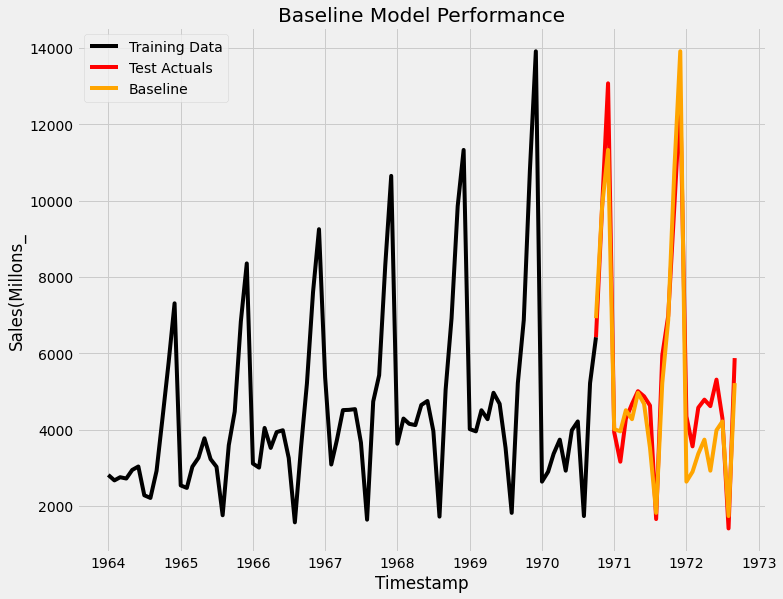

In [196]:
# Let's visually see the results
plt.plot(train, label='Training Data', color='black')
plt.plot(test, label='Test Actuals', color='red')
plt.plot(baseline_prediction, label='Baseline', color='orange')

# Plot Labels, Legends etc
plt.xlabel("Timestamp")
plt.ylabel("Sales(Millons_")
plt.legend(loc='best')
plt.title('Baseline Model Performance')



plt.show()

The naive approach seems to have a decent performance of 708.958. We need to use other model to check if the forecasting will be more accurate.

### Feature Engineering

**Performing Statistcal Tests**

There are certain good statistical tests one can apply to a dataset as a 'smoke alarm' test. They are a good indication whether data is conducive for accurate forecasting.

1. Stationarity: Stationarity is an importtant concept in time series analysis. Stationarity means that the statistical properties of a process generating time series does not change over time. It does not mean that the series does not change over time, just the way it changes does not itself change over time.

In [197]:
#testing for stationarity- Augmented Dickey Fuller Test
#Ho: It is non stationary P-value >0.05
#H1: It is stationary P-Value <=0.05
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [198]:
#testing for stationarity
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The above results show that we are dealing with a non-stationary data. Therefore, we'll need to look into methods to make the series stationary.

**Differencing**

Differencing is one of the possible methods of dealing with non-stationary data and it is used to try to make the data stationary. It entails subtracting subsequrny observations from one another.

In [199]:
# standard diferencing -periods=1
df['diff1'] = df['Sales'].diff()
df.head()

,Sales,diff1
Date,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [200]:
#standard differecing with period=12, because we are observing a seasonality of about 12 months
df['diff2'] = df['Sales'].diff(periods=12)
df.head()

,Sales,diff1,diff2
Date,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [201]:
#testing stationarity again with dickey fuller test
adfuller_test(df['diff1'].dropna())

ADF Test Statistic : -7.189896448050998
p-value : 2.519620447387099e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [202]:
#testing stationarity again with dickey fuller test
adfuller_test(df['diff2'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


With the p value being less than 0.05, we reject the null hypothesis, the data is now stationary.

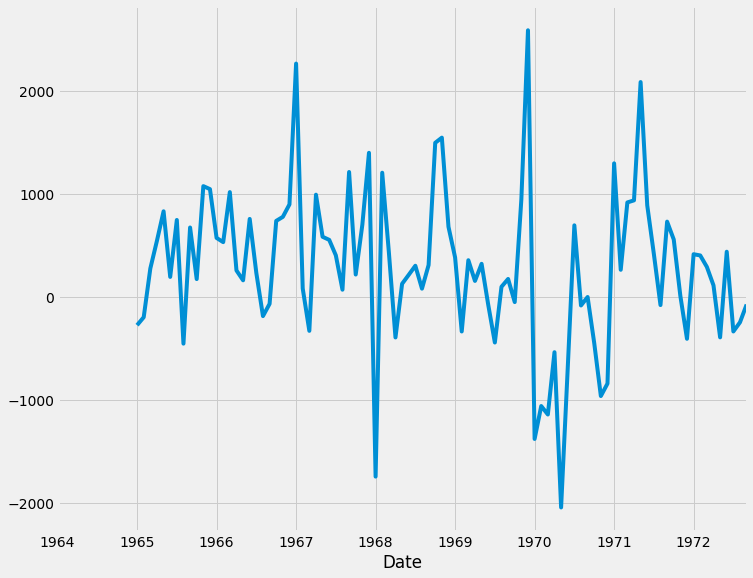

In [203]:
df['diff2'].plot()

### **Auto Regression Intergrated Moving Average(ARIMA)**

ARIMA is specified by three ordered parameters.(p,d,q).

1. Where p is the order of the autoregressive model(number of time lags)
2. d is the degree of differencing- the number of times the data has past values subtracted).
3. q is the order of the moving average model.

In order to fit the ARIMA model to the time series data, we need to find the optimized values for p,d,q parameters.

ARIMA basically integrates two naive forecasting techniques together:

1. **Autoregression** - Uses one or more past values to forecast the future. The number of values used is known as the 'order' (e.g. order 2 means yesterday and day before's value is used)

2. **Integrating** - the part that reduces seasonality. How many degrees of differencing is done to reduce seasonality is the 'order'.

3. **Moving Average** - Uses the Moving Average of the historical data to adjust the forecasted values. This has a 'smoothing' effect on the past data, as it uses the moving average rather than the actual values of the past. The number of days in the moving average window is the 'order'.

**Autocorrelation**

Autocorrelation is a type of serial dependence. This is when a time series is linearly related to a lagged version of itself. 

Often, one of the first steps in any data analysis is performing regression analysis. However, one of the assumptions of regression analysis is that the data has no autocorrelation. This can be frustrating because if you try to do a regression analysis on data with autocorrelation, then your analysis will be misleading.

Autocorrelation analysis can help uncover hidden patterns in the data and also help in selecting the correct forecasting methods. It can be used to identify seasonality and trend in the data. Analyzing the autocorrelation function(ACF) and partial autocorrelation function(PACF) in conjunction is necessary for selecting the appropriate ARIMA model for the time series. 

ACF is a measure of the correlation betwen the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations explained by the intervening comparisons.

In [204]:
#calculating autocorrelation using pandas autocorr()
#lag=1 (or data(t) vs. data(t-1))
shift_1 = df['Sales'].autocorr(lag=1)
print(shift_1)

0.46427769200036995


The above result shows a positive correlation. The next step is to make an autocorrelation plot.

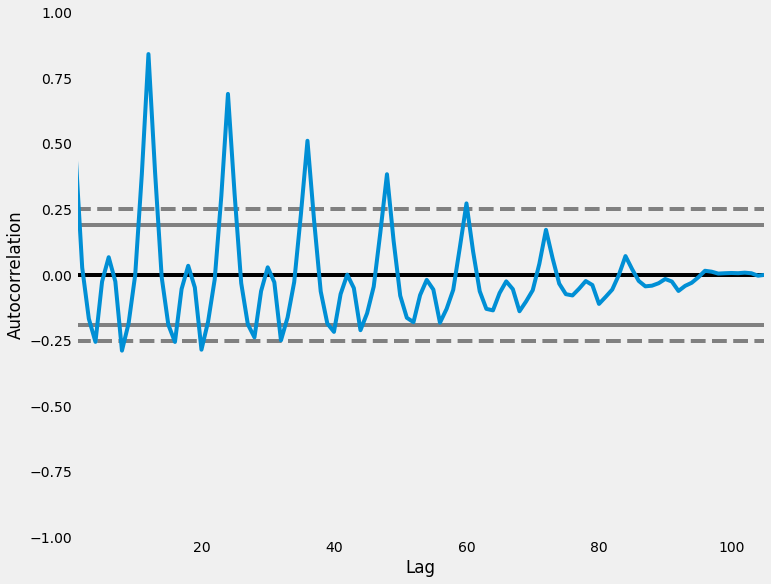

In [205]:
#plotting the autocorrelation plot using pandas
x = pd.plotting.autocorrelation_plot(df['Sales'])

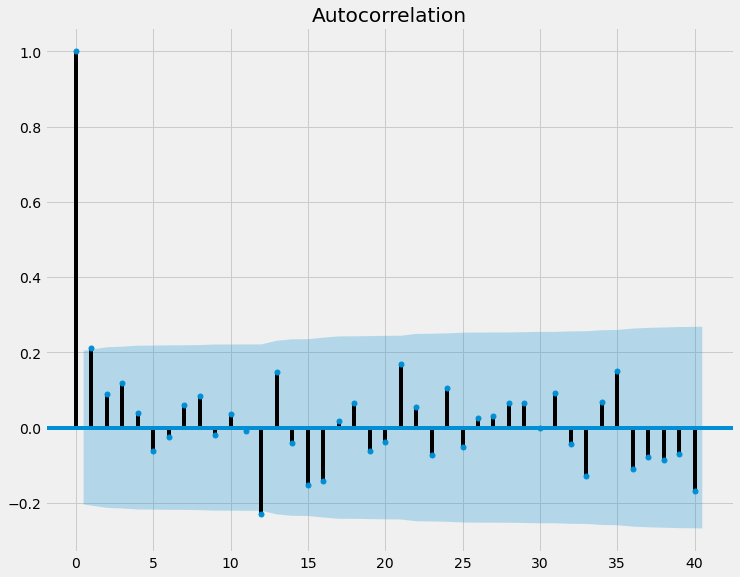

In [206]:
#plotting ACF
plot_acf(df['diff2'].iloc[13:],lags=40)
plt.show()

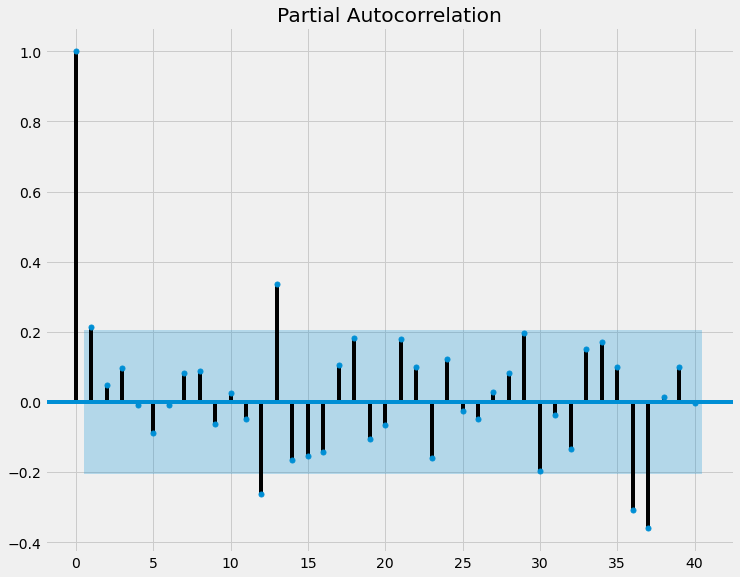

In [207]:
#plotting ACF
plot_pacf(df['diff2'].iloc[13:],lags=40)
plt.show()

1. The p value is the lag value where the PACF chart crosses the upper confidence level for the first time. in this case p=1.
2. the q value is the lag value where the ACF chart crosses the upper confidence level for the first time. q=0 or 1. The autocorrelation is considered as either 0 or 1 because of it only decreases exponentially to 1.

In [208]:
# For non-seasonal data_ARIMA is used with non-seasonal data only
#p=1, d=1, q=0 or 1
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


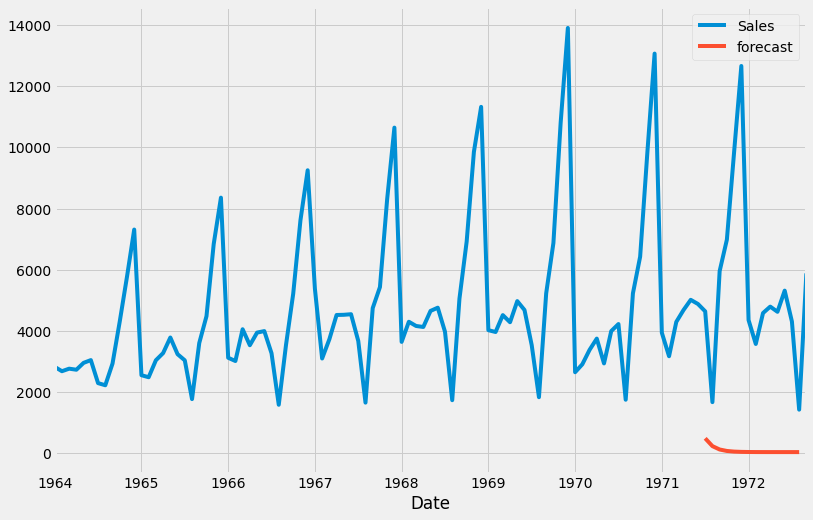

In [209]:
#plotting the predictions of the ARIMA model
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

The plot clearly shows the forecast is way off. This is because ARIMA model is used for non-seasonal data yet the data we are using is seasonal.

### Seasonal Autoregressive Intergrated Moving Avergae(SARIMA)

SARIMA then adds a 'seasonality' flavour to the ARIMA model - it factors in trends and seasonality.

The main hyperparameters are SARIMAX(p,d,q)(P,D,Q,m):

- autoregression order (p)
- Integrating order (d)
- moving average window (q)
- Seasonal autoregressive order (P)
- Seasonal difference order (D)
- Seasonal moving average order (Q)
- number of time steps for a single seasonal period (m)


In [210]:
#SARIMAX Model
#defining the hyperparameters
p = 1 # AR order
d = 1 # I degree
q = 1 # MA window
P = 1 # AR seasonal order
D = 1 # I seasonal order
Q = 1 # MA seasonal order
m = 12 # Seasonality period length

#fitting the model
model = SARIMAX(
    train['Sales'],
    order=(p, d, q),
    seasonal_order=(P, D, Q, m))
    
results =model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


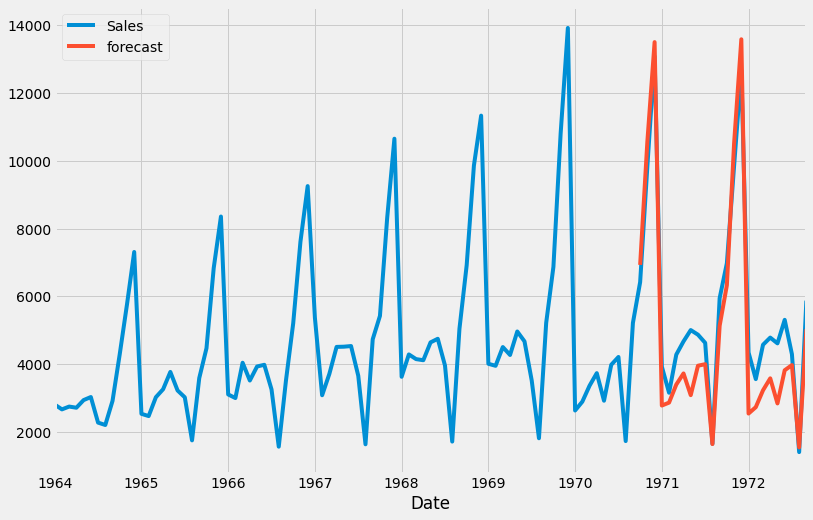

In [211]:
#predictions
df['forecast']=results.predict(start=test.index[0], end=test.index[-1], dynamic=False)
test['forecast'] = results.predict(start=test.index[0], end=test.index[-1], dynamic=False)
df[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [229]:
#Evaluate it's performance using Mean Absolute Error (MAE)

print("MAE SARIMA: {:.20f}".format(meanabs(test['Sales'], 
                                             test['forecast'])))

MAE SARIMA: 881.65785777421831426182


The SARIMAX model does well to predict the peaks but performs poorly on the once it hits the trough. We can use another model like FBProphet to compare the performance.

### Prophet
Facebook Prophet - is an open-source library that is also a generalised additive model (ie final result is made up of multiple components added together).

Unlike regular Generalised Linear Models, Facebook Prophet's uses a Bayesian curve fitting approach. The concept of Bayesian theorem is, at high level, trying to determine the probability of related events given knowledge/assumptions you already know (ie 'priors').

Prophet is different to SARIMA and HoltWinters, as it essentially decomposes time series differently by:

Data = Trend +/x Seasonality +/x Holidays +/x Noise

In Prophet, trend represents non-periodic changes while seasonality represents periodic changes. Where it differs from other statistic models like SARIMA and Holtwinters is Prophet factors in the uncertainty of trends changing.

In [218]:
#FB prophet
#crerating the training dataset
ftrain = train.reset_index().rename(columns={'Date':'ds', 'Sales': 'y'}) # Prophet takes ds and y as column names only

#defining the model
model = Prophet(
    n_changepoints=25 # Default is 25
    ,changepoint_prior_scale=0.05 # Default is 0.05
    ,seasonality_mode='additive'
    ,interval_width=0.8 # CI - default is 0.8 or 80%
)
model.fit(ftrain)



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [219]:
# Create the future dataframe with date range that will be used to test accuracy
future_df = test.reset_index()['Date'].to_frame().rename(columns={"Date":'ds'})

# Predict the future
forecast = model.predict(future_df)
PROPHET_prediction = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']][cutoff:]
PROPHET_prediction = PROPHET_prediction.rename(columns={'yhat': 'Sales'})

print("Finished training and predicting")

Finished training and predicting


Text(0.5, 1.0, 'Prophet Model Time Series Forecast')

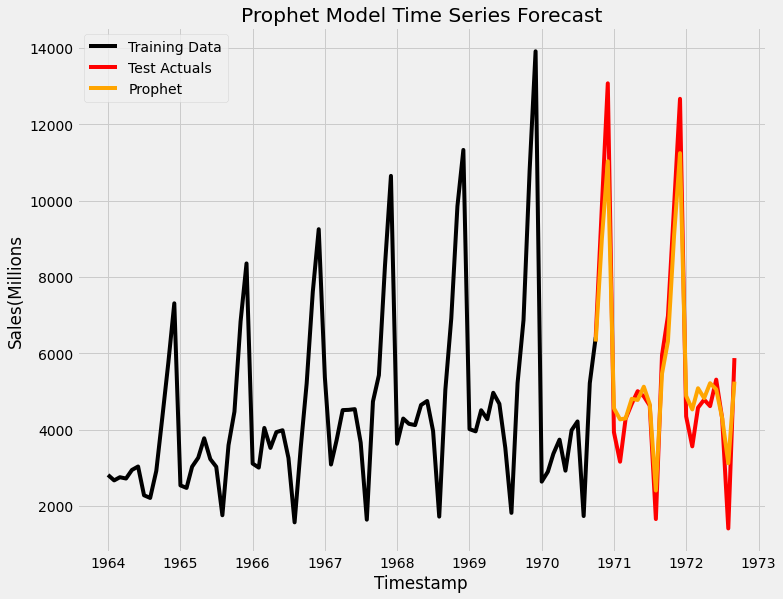

In [224]:
# Let's visually see the results
plt.plot(train['Sales'], label='Training Data', color='black')
plt.plot(test['Sales'], label='Test Actuals', color='red')
plt.plot(PROPHET_prediction['Sales'], label='Prophet', color='orange')

# Plot Labels, Legends etc
plt.xlabel("Timestamp")
plt.ylabel("Sales(Millions")
plt.legend(loc='best')
plt.title('Prophet Model Time Series Forecast')

In [225]:
#Evaluate it's performance using Mean Absolute Error (MAE)

print("MAE Prophet: {:.20f}".format(meanabs(test['Sales'], 
                                        PROPHET_prediction['Sales'])))

MAE Baseline: 613.39433750819966917334


**Comparing the Three Models**



In [234]:
#using the Root Mean Square
print("RMSE Baseline: {:.20f}".format(np.sqrt(mean_squared_error(test['Sales'],baseline_prediction['Sales']))))
print("RMSE SARIMA: {:.20f}".format(np.sqrt(mean_squared_error(test['Sales'],test['forecast']))))
print("RMSE Prophet: {:.20f}".format(np.sqrt(mean_squared_error(test['Sales'],PROPHET_prediction['Sales']))))

RMSE Baseline: 901.88707256877046347654
RMSE SARIMA: 1013.36914225516852638975
RMSE Prophet: 808.82078530801572924247


**Conclusion**

We can observe from the above results that the worst performing model, is the SARIMA model which is performing even below the baseline model(Naive Approach). The best performing model is Prophet. However, the model(Prophet) does not predict/forecast the sales peaks quite well, hence the error.

To improve the models performance, we can explore:
1. Using a combination of models(ensemble) to reduce the MAE. 
2. Removing trend and seasonality in the data.
3. We can also consider additional factors such as holidays which might have some effect on the Sales forecast.


**References:**

1. https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638
2. [Theory on stationarity](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322)
3. [Differencing Theory](https://towardsdatascience.com/an-intuitive-guide-to-differencing-time-series-in-python-1d6c7a2c067a)
4. Autocorrelation in Time Series: https://medium.com/@dganais/autocorrelation-in-time-series-c870e87e8a65
5. https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424